In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Convert Excel to CSV
excel_path = r'D:\AI Projects\2-DEEP LEARNING\1- Intro to ANN and Keras\Project - Student\Students_Performance_data_set.xlsx'
csv_path = r'D:\AI Projects\2-DEEP LEARNING\1- Intro to ANN and Keras\Project - Student\Students_Performance_data_set.csv'
df = pd.read_excel(excel_path)
df.to_csv(csv_path, index=False)

# Read the CSV file
df_csv = pd.read_csv(csv_path)
df_csv.head()

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,What is you interested area?,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,...,Data Schince,Single,Yes,Bachelor,No,2.68,No,3.15,75,25000
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,...,Event management,Single,Yes,Family,No,2.68,No,3.15,36,100000
2,2020,Female,21,2019,BCSE,5,No,No,3,3,...,Software,Single,No,Bachelor,No,2.68,No,3.15,50,50000
3,2021,Male,20,2020,BCSE,4,Yes,No,1,3,...,Artificial Intelligence,Single,No,Bachelor,Yes,2.68,No,3.15,36,62488
4,2021,Male,22,2019,BCSE,4,Yes,No,3,1,...,Software,Relationship,No,Bachelor,Yes,2.68,No,3.15,36,50000


In [3]:
rename_dict = {
    "University Admission year": "admission_year",
    "Gender": "gender",
    "Age": "age",
    "H.S.C passing year": "hsc_year",
    "Program": "program",
    "Current Semester": "semester",
    "Do you have meritorious scholarship ?": "scholarship",
    "Do you use University transportation?": "transport",
    "How many hour do you study daily?": "study_hours_day",
    "How many times do you seat for study in a day?": "study_sessions_day",
    "What is your preferable learning mode?": "learning_mode",
    "Do you use smart phone?": "smartphone",
    "Do you have personal Computer?": "personal_pc",
    "How many hour do you spent daily in social media?": "social_media_hours",
    "Status of your English language proficiency": "english_skill",
    "Average attendance on class": "attendance",
    "Did you ever fall in probation?": "probation",
    "Did you ever got suspension?": "suspension",
    "Do you attend in teacher consultancy for any kind of academical problems?": "teacher_consult",
    "What are the skills do you have ?": "skills",
    "How many hour do you spent daily on your skill development?": "skill_dev_hours",
    "What is you interested area?": "interest_area",
    "What is your relationship status?": "relationship",
    "Are you engaged with any co-curriculum activities?": "co_curricular",
    "With whom you are living with?": "living_with",
    "Do you have any health issues?": "health_issues",
    "What was your previous SGPA?": "prev_sgpa",
    "Do you have any physical disabilities?": "disabilities",
    "What is your current CGPA?": "current_cgpa",
    "How many Credit did you have completed?": "credits_completed",
    "What is your monthly family income?": "family_income"
}

# Rename columns
df.rename(columns=rename_dict, inplace=True)

# Verify
print(df.columns.tolist())

['admission_year', 'gender', 'age', 'hsc_year', 'program', 'semester', 'scholarship', 'transport', 'study_hours_day', 'study_sessions_day', 'learning_mode', 'smartphone', 'personal_pc', 'social_media_hours', 'english_skill', 'attendance', 'probation', 'suspension', 'teacher_consult', 'skills', 'skill_dev_hours', 'interest_area', 'relationship', 'co_curricular', 'living_with', 'health_issues', 'prev_sgpa', 'disabilities', 'current_cgpa', 'credits_completed', 'family_income']


In [4]:
df.head()

,admission_year,gender,age,hsc_year,program,semester,scholarship,transport,study_hours_day,study_sessions_day,...,interest_area,relationship,co_curricular,living_with,health_issues,prev_sgpa,disabilities,current_cgpa,credits_completed,family_income
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,...,Data Schince,Single,Yes,Bachelor,No,2.68,No,3.15,75,25000
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,...,Event management,Single,Yes,Family,No,2.68,No,3.15,36,100000
2,2020,Female,21,2019,BCSE,5,No,No,3,3,...,Software,Single,No,Bachelor,No,2.68,No,3.15,50,50000
3,2021,Male,20,2020,BCSE,4,Yes,No,1,3,...,Artificial Intelligence,Single,No,Bachelor,Yes,2.68,No,3.15,36,62488
4,2021,Male,22,2019,BCSE,4,Yes,No,3,1,...,Software,Relationship,No,Bachelor,Yes,2.68,No,3.15,36,50000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   admission_year      1194 non-null   int64  
 1   gender              1194 non-null   object 
 2   age                 1194 non-null   int64  
 3   hsc_year            1194 non-null   int64  
 4   program             1194 non-null   object 
 5   semester            1194 non-null   int64  
 6   scholarship         1194 non-null   object 
 7   transport           1194 non-null   object 
 8   study_hours_day     1194 non-null   int64  
 9   study_sessions_day  1194 non-null   int64  
 10  learning_mode       1194 non-null   object 
 11  smartphone          1194 non-null   object 
 12  personal_pc         1194 non-null   object 
 13  social_media_hours  1194 non-null   int64  
 14  english_skill       1194 non-null   object 
 15  attendance          1194 non-null   object 
 16  probat

In [6]:
df.describe(include='all')

,admission_year,gender,age,hsc_year,program,semester,scholarship,transport,study_hours_day,study_sessions_day,...,interest_area,relationship,co_curricular,living_with,health_issues,prev_sgpa,disabilities,current_cgpa,credits_completed,family_income
count,1194.000000,1194,1194.000000,1194.000000,1194,1194.000000,1194,1194,1194.000000,1194.000000,...,1194,1194,1194,1194,1194,1194.000000,1194,1194.000000,1194.000000,1.194000e+03
unique,NaN,2,NaN,NaN,1,NaN,2,2,NaN,NaN,...,25,5,2,2,4,NaN,2,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,BCSE,NaN,No,No,NaN,NaN,...,Software,Single,No,Family,No,NaN,No,NaN,NaN,NaN
freq,NaN,672,NaN,NaN,1194,NaN,671,697,NaN,NaN,...,648,896,689,642,983,NaN,1167,NaN,NaN,NaN
mean,2020.515075,NaN,21.343384,2019.214405,NaN,6.539363,NaN,NaN,3.131491,1.940536,...,NaN,NaN,NaN,NaN,NaN,2.683946,NaN,3.165600,71.842546,6.248812e+04
std,1.354954,NaN,1.613338,1.380960,NaN,3.809884,NaN,NaN,1.649597,0.856305,...,NaN,NaN,NaN,NaN,NaN,0.871589,NaN,0.750127,48.074338,7.617356e+04
min,2013.000000,NaN,18.000000,2012.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,4.000000e+03
25%,2020.000000,NaN,20.000000,2019.000000,NaN,3.000000,NaN,NaN,2.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,2.200000,NaN,2.900000,23.000000,3.000000e+04
50%,2021.000000,NaN,21.000000,2020.000000,NaN,7.000000,NaN,NaN,3.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,2.680000,NaN,3.210000,78.000000,5.000000e+04
75%,2022.000000,NaN,22.000000,2020.000000,NaN,10.000000,NaN,NaN,4.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,3.380000,NaN,3.670000,117.000000,7.400000e+04


In [7]:
df.isnull().sum()

admission_year        0
gender                0
age                   0
hsc_year              0
program               0
semester              0
scholarship           0
transport             0
study_hours_day       0
study_sessions_day    0
learning_mode         0
smartphone            0
personal_pc           0
social_media_hours    0
english_skill         0
attendance            0
probation             0
suspension            0
teacher_consult       0
skills                1
skill_dev_hours       0
interest_area         0
relationship          0
co_curricular         0
living_with           0
health_issues         0
prev_sgpa             0
disabilities          0
current_cgpa          0
credits_completed     0
family_income         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

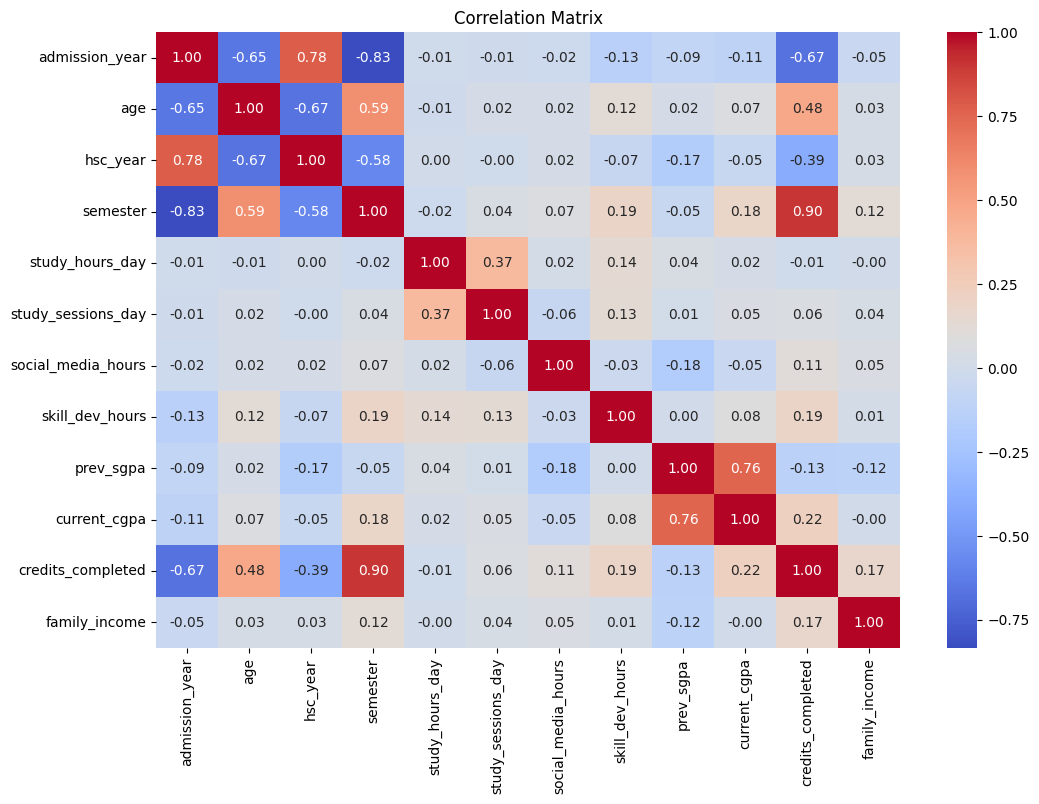

In [9]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

## Correlation Matrix

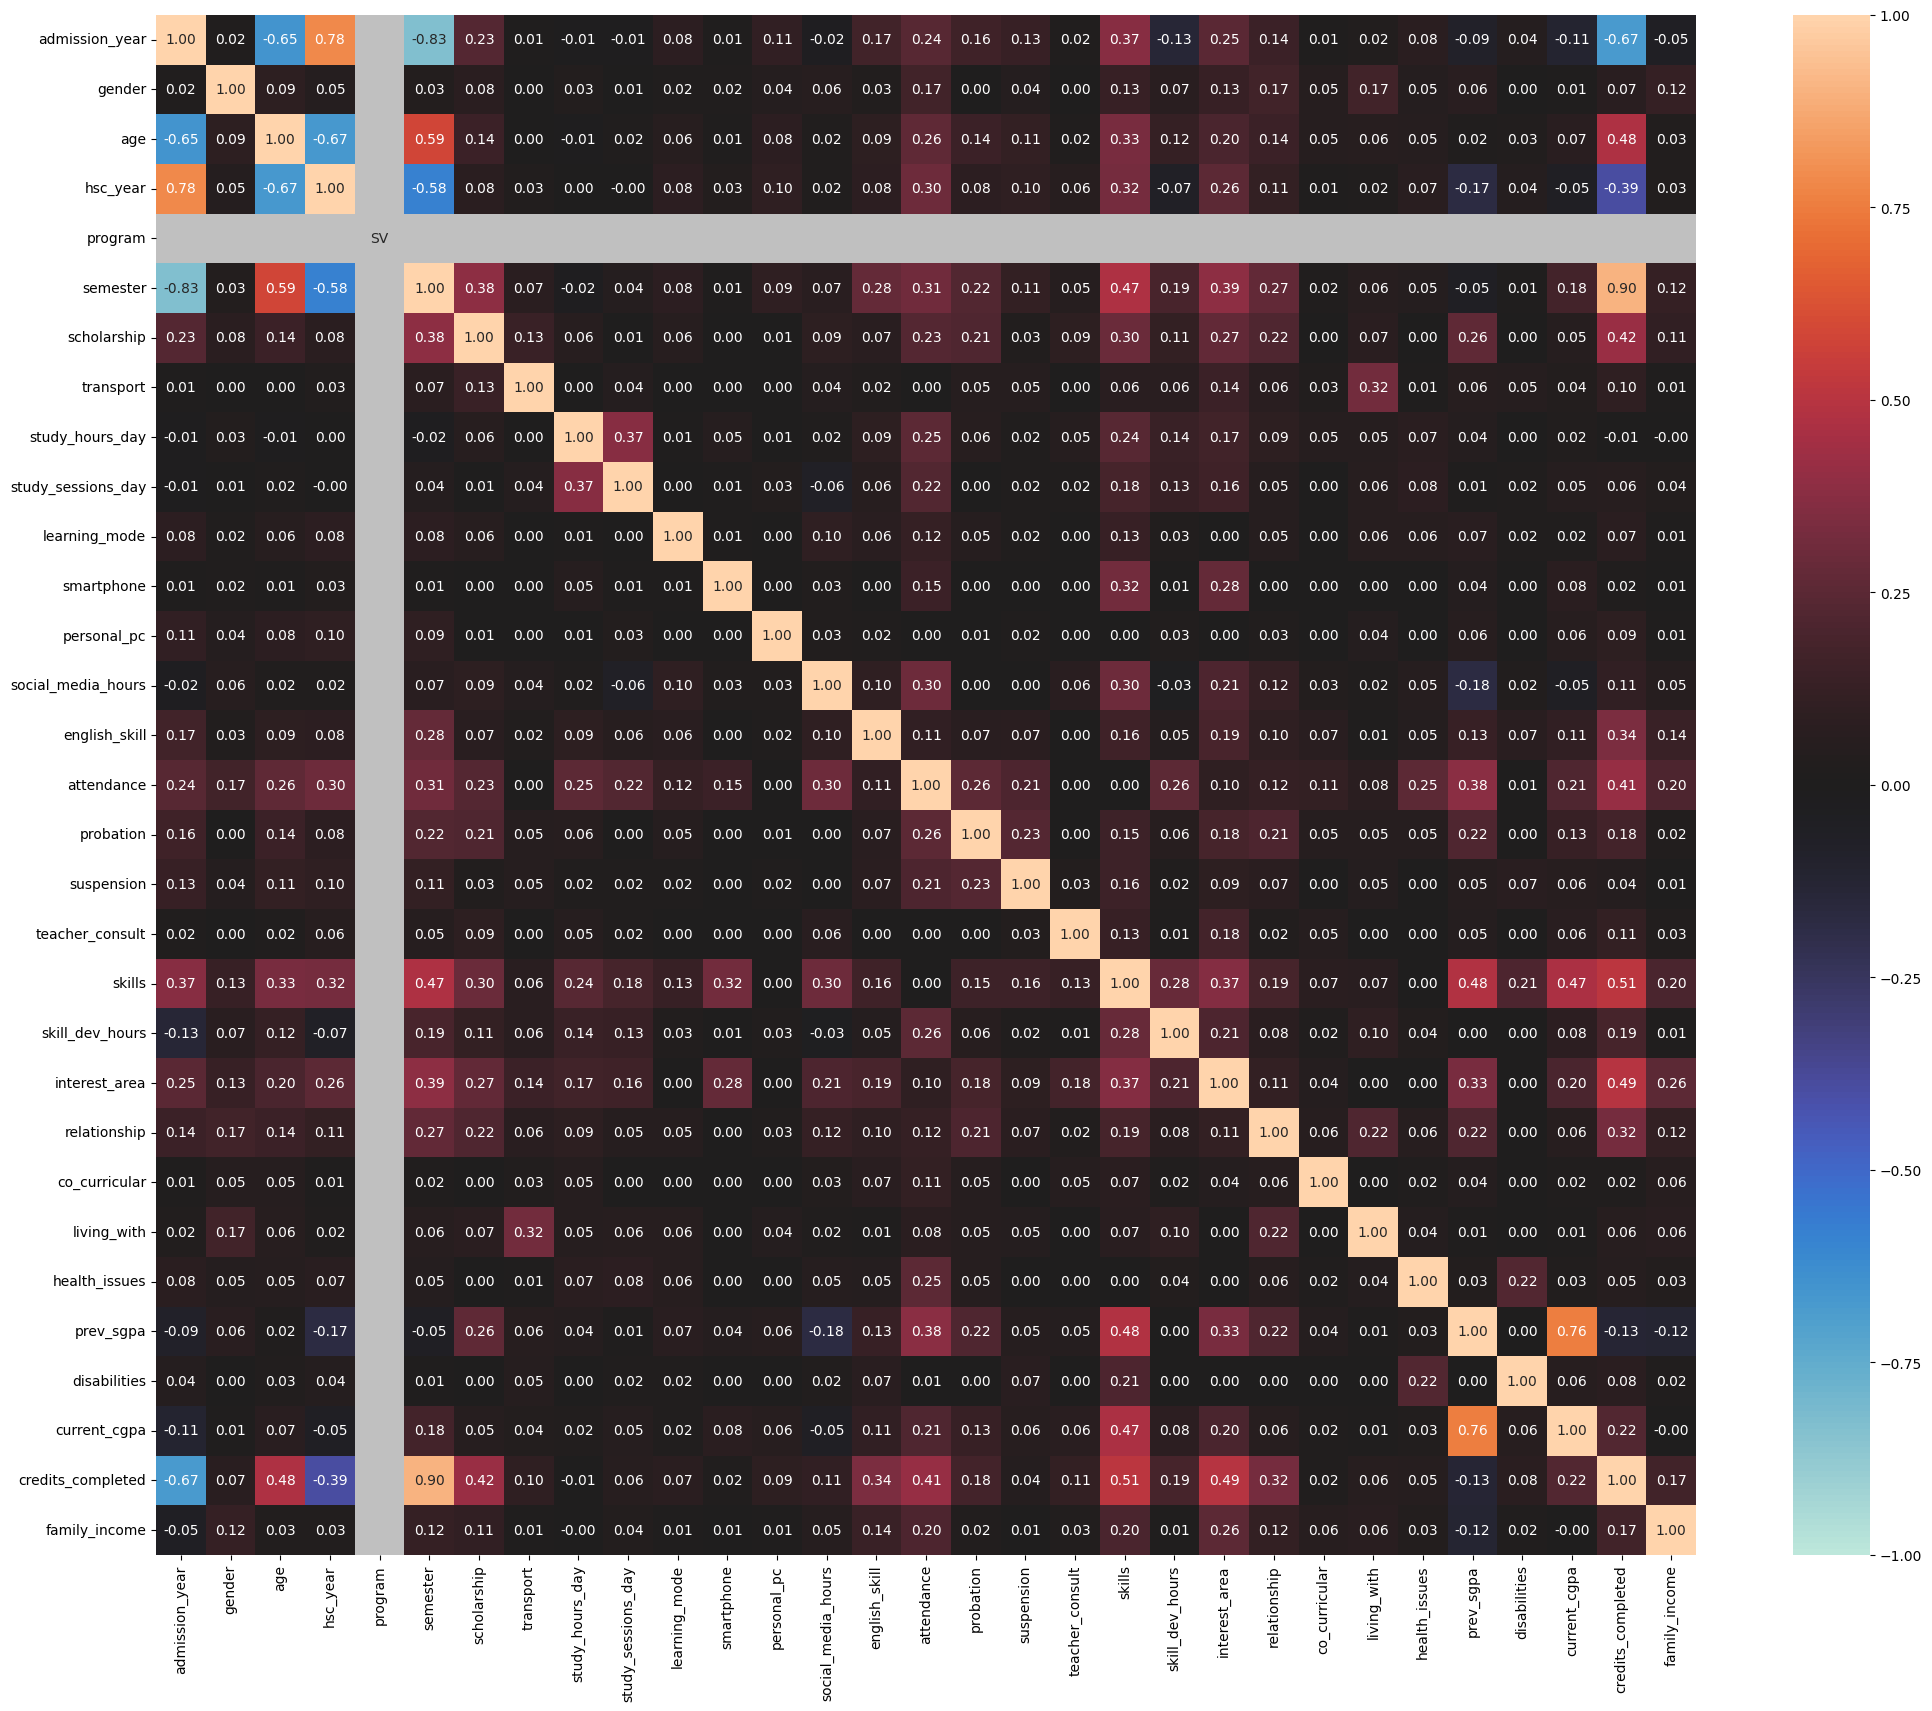

{'corr':                     admission_year    gender       age  hsc_year  program  \
 admission_year            1.000000  0.017616 -0.650018  0.782228      0.0   
 gender                    0.017616  1.000000  0.090298  0.045355      0.0   
 age                      -0.650018  0.090298  1.000000 -0.665891      0.0   
 hsc_year                  0.782228  0.045355 -0.665891  1.000000      0.0   
 program                   0.000000  0.000000  0.000000  0.000000      0.0   
 semester                 -0.834406  0.031679  0.585559 -0.579773      0.0   
 scholarship               0.230098  0.076942  0.140882  0.076878      0.0   
 transport                 0.008772  0.000000  0.001751  0.030229      0.0   
 study_hours_day          -0.009701  0.032113 -0.012256  0.003068      0.0   
 study_sessions_day       -0.011147  0.007811  0.018433 -0.003386      0.0   
 learning_mode             0.081223  0.020157  0.056155  0.082358      0.0   
 smartphone                0.012053  0.022460  0.011318 

In [10]:
from dython.nominal import associations

associations(df, nominal_columns = 'auto', figsize=(25, 20))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   admission_year      1194 non-null   int64  
 1   gender              1194 non-null   object 
 2   age                 1194 non-null   int64  
 3   hsc_year            1194 non-null   int64  
 4   program             1194 non-null   object 
 5   semester            1194 non-null   int64  
 6   scholarship         1194 non-null   object 
 7   transport           1194 non-null   object 
 8   study_hours_day     1194 non-null   int64  
 9   study_sessions_day  1194 non-null   int64  
 10  learning_mode       1194 non-null   object 
 11  smartphone          1194 non-null   object 
 12  personal_pc         1194 non-null   object 
 13  social_media_hours  1194 non-null   int64  
 14  english_skill       1194 non-null   object 
 15  attendance          1194 non-null   object 
 16  probat

In [12]:
df['health_issues'] = df['health_issues'].str.strip().str.lower()
df['health_issues'] = df['health_issues'].replace({'n': 'no'})
df['health_issues'] = df['health_issues'].map({'no': 'No', 'yes': 'Yes'})

In [13]:
for col in df.columns:
    print(f'Feature: {col}')
    print(df[col].value_counts(dropna=False))
    print('-'*40)

Feature: admission_year
admission_year
2021    328
2022    324
2020    283
2019    179
2018     49
2017     12
2023      6
2015      5
2016      4
2014      3
2013      1
Name: count, dtype: int64
----------------------------------------
Feature: gender
gender
Male      672
Female    522
Name: count, dtype: int64
----------------------------------------
Feature: age
age
20    352
21    295
22    213
23    109
19     81
24     69
25     58
26     12
18      4
27      1
Name: count, dtype: int64
----------------------------------------
Feature: hsc_year
hsc_year
2020    481
2019    302
2018    171
2021    115
2017     67
2016     28
2014     10
2022      9
2015      5
2013      3
2012      2
2028      1
Name: count, dtype: int64
----------------------------------------
Feature: program
program
BCSE    1194
Name: count, dtype: int64
----------------------------------------
Feature: semester
semester
2     211
11    166
8     149
3      99
9      98
10     90
4      77
5      65
7      64


## Checking for class Imbalances

In [14]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Feature: {col}")
    print(df[col].value_counts(normalize=True) * 100)  # % distribution
    print("-" * 40)

Feature: gender
gender
Male      56.281407
Female    43.718593
Name: proportion, dtype: float64
----------------------------------------
Feature: program
program
BCSE    100.0
Name: proportion, dtype: float64
----------------------------------------
Feature: scholarship
scholarship
No     56.197655
Yes    43.802345
Name: proportion, dtype: float64
----------------------------------------
Feature: transport
transport
No     58.375209
Yes    41.624791
Name: proportion, dtype: float64
----------------------------------------
Feature: learning_mode
learning_mode
Offline    71.859296
Online     28.140704
Name: proportion, dtype: float64
----------------------------------------
Feature: smartphone
smartphone
Yes    98.659966
No      1.340034
Name: proportion, dtype: float64
----------------------------------------
Feature: personal_pc
personal_pc
Yes    91.708543
No      8.291457
Name: proportion, dtype: float64
----------------------------------------
Feature: english_skill
english_skill
In

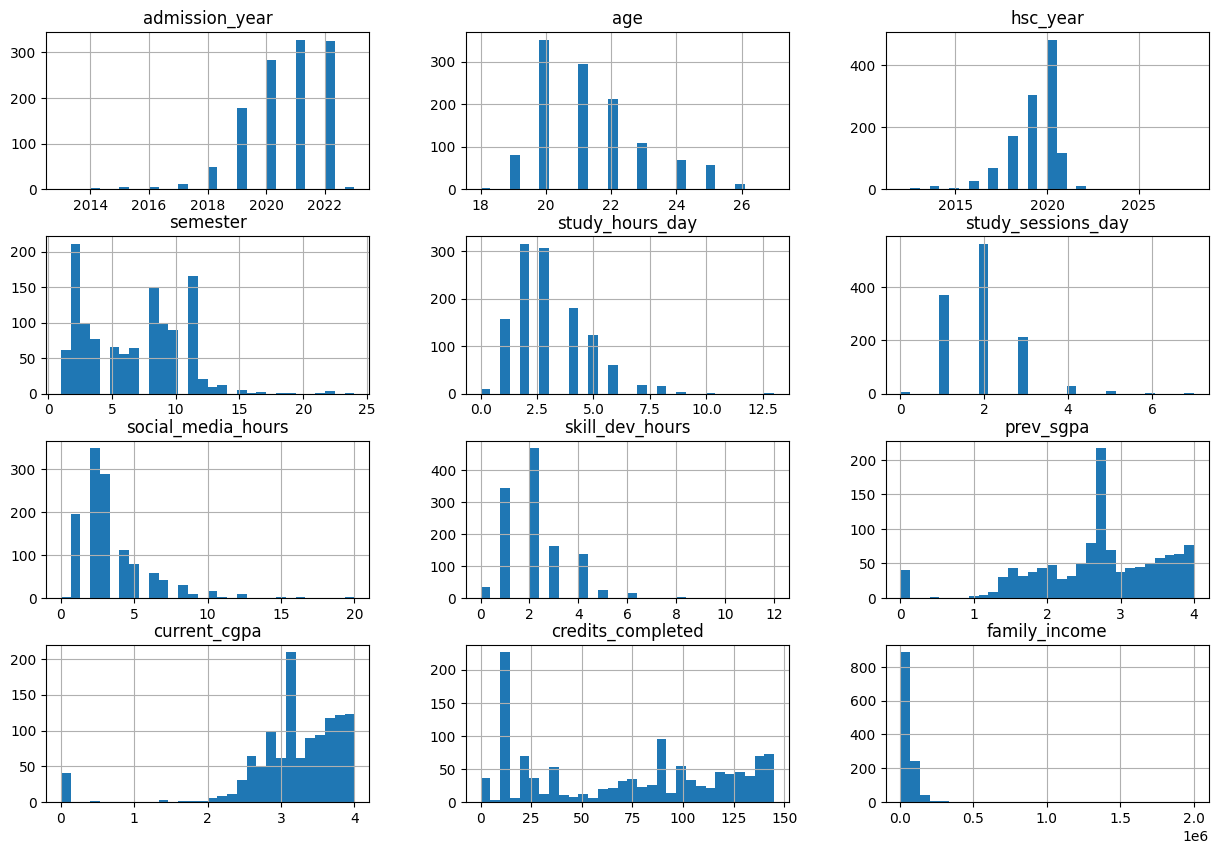

In [15]:
df.select_dtypes(include=['number']).hist(bins=30, figsize=(15, 10))
plt.show()

## Encoding the data

In [16]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original data
df_encoded = df.copy()

# Encode all object type columns
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # store encoder for inverse transform if needed

df_encoded.head()

,admission_year,gender,age,hsc_year,program,semester,scholarship,transport,study_hours_day,study_sessions_day,...,interest_area,relationship,co_curricular,living_with,health_issues,prev_sgpa,disabilities,current_cgpa,credits_completed,family_income
0,2018,1,24,2016,0,12,1,0,3,2,...,7,4,1,0,0,2.68,0,3.15,75,25000
1,2021,1,22,2020,0,4,1,1,3,2,...,10,4,1,1,0,2.68,0,3.15,36,100000
2,2020,0,21,2019,0,5,0,0,3,3,...,16,4,0,0,0,2.68,0,3.15,50,50000
3,2021,1,20,2020,0,4,1,0,1,3,...,0,4,0,0,1,2.68,0,3.15,36,62488
4,2021,1,22,2019,0,4,1,0,3,1,...,16,3,0,0,1,2.68,0,3.15,36,50000


# Removing Multicollinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df_encoded.drop(columns=['prev_sgpa'])  # Assuming this is target
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

# Sort by VIF descending
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data)


               Feature           VIF
0       admission_year  6.868103e+06
1             hsc_year  6.845330e+06
2                  age  3.170729e+02
3           smartphone  7.646138e+01
4             semester  2.897907e+01
5         relationship  2.892332e+01
6    credits_completed  2.337999e+01
7         current_cgpa  2.162209e+01
8        interest_area  1.794439e+01
9          personal_pc  1.250204e+01
10              skills  9.693799e+00
11  study_sessions_day  7.390884e+00
12     study_hours_day  5.636638e+00
13       english_skill  4.478375e+00
14     skill_dev_hours  4.216934e+00
15          attendance  3.511747e+00
16  social_media_hours  3.286466e+00
17              gender  2.598371e+00
18         living_with  2.597340e+00
19         scholarship  2.372674e+00
20     teacher_consult  2.347350e+00
21           transport  1.992316e+00
22       co_curricular  1.804476e+00
23       family_income  1.793235e+00
24           probation  1.605255e+00
25       learning_mode  1.455774e+00
2

C:\Users\Devyansh\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [18]:
# Drop 'admission_year' and 'hsc_year'
df_encoded.drop(['admission_year', 'hsc_year'], axis=1, inplace=True)

In [19]:
# Calculate VIF for each feature
X = df_encoded.drop(columns=['prev_sgpa'])  # Assuming this is target
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

# Sort by VIF descending
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data)


               Feature         VIF
0                  age  119.148678
1           smartphone   62.518856
2         relationship   26.730138
3             semester   26.473310
4    credits_completed   22.752541
5         current_cgpa   20.919171
6        interest_area   17.494348
7          personal_pc   12.225451
8               skills    9.675827
9   study_sessions_day    7.343656
10     study_hours_day    5.620428
11       english_skill    4.465879
12     skill_dev_hours    4.208864
13          attendance    3.510418
14  social_media_hours    3.261800
15              gender    2.586847
16         living_with    2.562076
17         scholarship    2.368759
18     teacher_consult    2.345664
19           transport    1.988747
20       co_curricular    1.802415
21       family_income    1.782918
22           probation    1.591875
23       learning_mode    1.452245
24       health_issues    1.314217
25          suspension    1.145814
26        disabilities    1.127711
27             progr

C:\Users\Devyansh\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [20]:
df_encoded.drop(['age'], axis=1, inplace=True)

In [21]:
# Calculate VIF for each feature
X = df_encoded.drop(columns=['prev_sgpa'])  # Assuming this is target
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

# Sort by VIF descending
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data)


               Feature        VIF
0           smartphone  43.124727
1             semester  24.858711
2         relationship  24.842983
3    credits_completed  22.752337
4         current_cgpa  20.443974
5        interest_area  16.957191
6          personal_pc  11.785671
7               skills   9.604187
8   study_sessions_day   7.285101
9      study_hours_day   5.605865
10       english_skill   4.351872
11     skill_dev_hours   4.197924
12          attendance   3.480107
13  social_media_hours   3.208480
14              gender   2.559310
15         living_with   2.536320
16         scholarship   2.345457
17     teacher_consult   2.332187
18           transport   1.987876
19       co_curricular   1.781067
20       family_income   1.775971
21           probation   1.571086
22       learning_mode   1.451699
23       health_issues   1.310252
24          suspension   1.145704
25        disabilities   1.126588
26             program        NaN


C:\Users\Devyansh\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


## Here I checked which one is more informative, but it will not make much difference

In [22]:
df_encoded[['smartphone', 'personal_pc', 'prev_sgpa']].corr()['prev_sgpa']

smartphone     0.039739
personal_pc    0.058813
prev_sgpa      1.000000
Name: prev_sgpa, dtype: float64

In [23]:
df_encoded.drop(['smartphone'], axis=1, inplace=True)

In [24]:
# Calculate VIF for each feature
X = df_encoded.drop(columns=['current_cgpa'])  # Assuming this is target
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

# Sort by VIF descending
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data)


               Feature        VIF
0             semester  25.070447
1    credits_completed  21.716023
2         relationship  20.377322
3        interest_area  15.994024
4            prev_sgpa  12.451356
5          personal_pc  11.152569
6               skills   9.839349
7   study_sessions_day   7.092432
8      study_hours_day   5.610548
9        english_skill   4.319884
10     skill_dev_hours   4.167230
11          attendance   3.540651
12  social_media_hours   3.135883
13              gender   2.556952
14         living_with   2.473925
15         scholarship   2.388533
16     teacher_consult   2.322759
17           transport   1.983052
18       co_curricular   1.773886
19       family_income   1.767749
20           probation   1.553760
21       learning_mode   1.452708
22       health_issues   1.307557
23          suspension   1.145080
24        disabilities   1.125378
25             program        NaN


C:\Users\Devyansh\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


## Outlier Detection

In [25]:
def detect_outliers_iqr(df):
    outlier_info = {}
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        if not outliers.empty:
            outlier_info[col] = {
                "count": len(outliers),
                "percentage": round((len(outliers) / len(df)) * 100, 2),
                "outlier_values": outliers.unique()
            }
    return pd.DataFrame(outlier_info).T.sort_values("count", ascending=False)

# Detect outliers in your encoded dataframe
outlier_summary = detect_outliers_iqr(df_encoded)
outlier_summary

,count,percentage,outlier_values
probation,298,24.96,[1]
relationship,298,24.96,"[3, 2, 0, 1]"
health_issues,207,17.34,[1]
personal_pc,99,8.29,[0]
social_media_hours,71,5.95,"[8, 15, 10, 12, 20, 16, 11, 9]"
family_income,61,5.11,"[200000, 350000, 600000, 150000, 500000, 40000..."
suspension,46,3.85,[1]
current_cgpa,45,3.77,"[0.0, 0.5, 0.13125, 1.45, 1.42, 1.64]"
study_sessions_day,42,3.52,"[4, 5, 7, 6]"
prev_sgpa,40,3.35,"[0.0, 0.13125]"


               Feature  Importance
23        current_cgpa    0.581203
24   credits_completed    0.104403
2             semester    0.080190
25       family_income    0.069361
11          attendance    0.033479
15              skills    0.032365
9   social_media_hours    0.019089
17       interest_area    0.018044
16     skill_dev_hours    0.010513
5      study_hours_day    0.008268
3          scholarship    0.006994
18        relationship    0.005276
10       english_skill    0.004517
6   study_sessions_day    0.004284
12           probation    0.003689
4            transport    0.002332
7        learning_mode    0.002315
14     teacher_consult    0.002307
21       health_issues    0.002191
19       co_curricular    0.001996
20         living_with    0.001877
8          personal_pc    0.001708
0               gender    0.001651
13          suspension    0.001557
22        disabilities    0.000390
1              program    0.000000


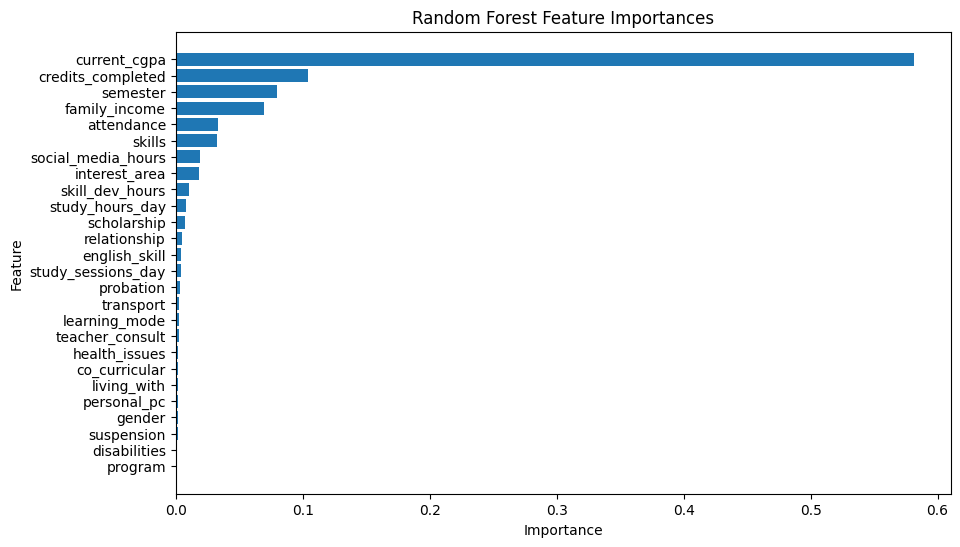

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
X = df_encoded.drop('prev_sgpa', axis=1)
y = df_encoded['prev_sgpa']

# Build the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Sort by importance
importances = importances.sort_values(by='Importance', ascending=False)

print(importances)

# Optional: Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()


               Feature  Importance  Importance (%)
0         current_cgpa    0.581203       58.120292
1    credits_completed    0.104403       10.440291
2             semester    0.080190        8.019028
3        family_income    0.069361        6.936078
4           attendance    0.033479        3.347879
5               skills    0.032365        3.236478
6   social_media_hours    0.019089        1.908937
7        interest_area    0.018044        1.804442
8      skill_dev_hours    0.010513        1.051348
9      study_hours_day    0.008268        0.826790
10         scholarship    0.006994        0.699384
11        relationship    0.005276        0.527607
12       english_skill    0.004517        0.451742
13  study_sessions_day    0.004284        0.428354
14           probation    0.003689        0.368882
15           transport    0.002332        0.233158
16       learning_mode    0.002315        0.231546
17     teacher_consult    0.002307        0.230706
18       health_issues    0.002

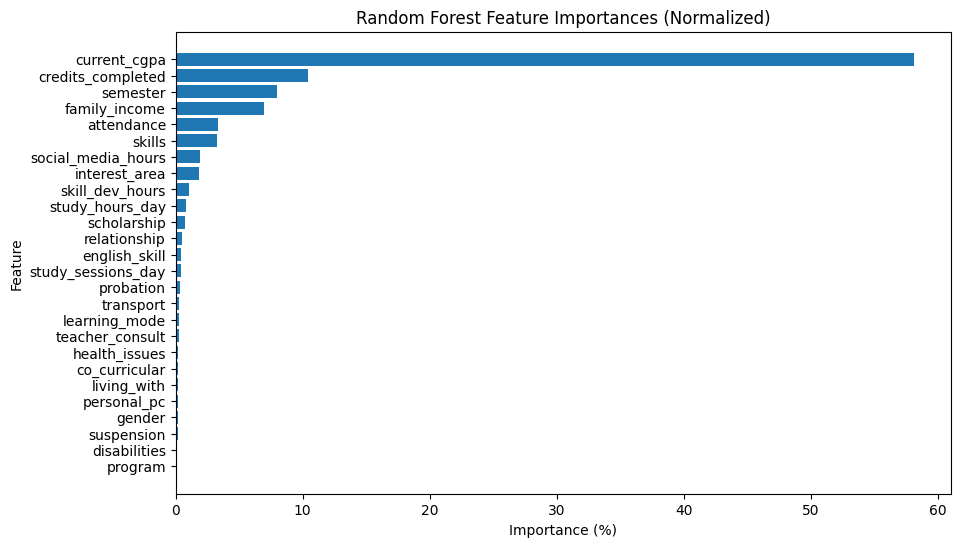

In [27]:
# Separate features and target
X = df_encoded.drop('prev_sgpa', axis=1)
y = df_encoded['prev_sgpa']

# Build the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

# Get feature importances and normalize to percentages
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})
importances['Importance (%)'] = 100 * (importances['Importance'] / importances['Importance'].sum())

# Sort by importance
importances = importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print results
print(importances)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance (%)'])
plt.gca().invert_yaxis()
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances (Normalized)')
plt.show()

## Dropping the unwanted features

In [28]:
# Features to drop
features_to_drop = [
    'probation',
    'study_sessions_day',
    'study_hours_day',
    'health_issues',
    'english_skill',
    'relationship',
    'gender',
    'scholarship',
    'living_with',
    'co_curricular',
    'transport',
    'teacher_consult',
    'learning_mode',
    'personal_pc',
    'suspension',
    'disabilities',
    'program'
]

# Drop from DataFrame
df_encoded = df_encoded.drop(columns=features_to_drop)


## Making our model (here we also did scaling)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df_encoded.drop(columns=['current_cgpa'])
y = df_encoded['current_cgpa']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale target variable
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(1)  # single neuron for regression output
])

optimizer = Adam(learning_rate=0.0001)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

# Train model
history = model.fit(
    X_train, y_train_scaled,
    validation_data=(X_test, y_test_scaled),
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100


C:\Users\Devyansh\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.1775 - mae: 1.2224 - val_loss: 1.0234 - val_mae: 0.6486
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9986 - mae: 0.9656 - val_loss: 0.9474 - val_mae: 0.6431
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1168 - mae: 0.9995 - val_loss: 0.9251 - val_mae: 0.6424
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9821 - mae: 0.9831 - val_loss: 0.9046 - val_mae: 0.6375
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8776 - mae: 0.9683 - val_loss: 0.8984 - val_mae: 0.6399
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6661 - mae: 0.9085 - val_loss: 0.8931 - val_mae: 0.6382
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4366 - mae: 0.8291 - val_loss: 0.9077 - val_mae: 0.6439
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5290 - mae: 0.8888 - val_loss: 0.8931 - val_mae: 0.6365
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5469 - mae: 0.8

In [31]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error: {mae:.4f}")

Mean Absolute Error: 3.2851


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MSE: 11.3020
RMSE: 3.3619
R² Score: -20.9995


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.1561 - mae: 3.0836 - val_loss: 10.0885 - val_mae: 3.0961
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1029 - mae: 2.9316 - val_loss: 8.4634 - val_mae: 2.8298
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4255 - mae: 2.6366 - val_loss: 6.7297 - val_mae: 2.5090
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8566 - mae: 2.3006 - val_loss: 5.2865 - val_mae: 2.1940
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4147 - mae: 1.9408 - val_loss: 4.0868 - val_mae: 1.8879
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4263 - mae: 1.6305 - val_loss: 3.1802 - val_mae: 1.6207
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7087 - mae: 1.4200 - val_loss: 2.5723 - val_mae: 1.4199
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1321 - mae: 1.2329 - val_loss: 2.1595 - val_mae: 1.2828
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0

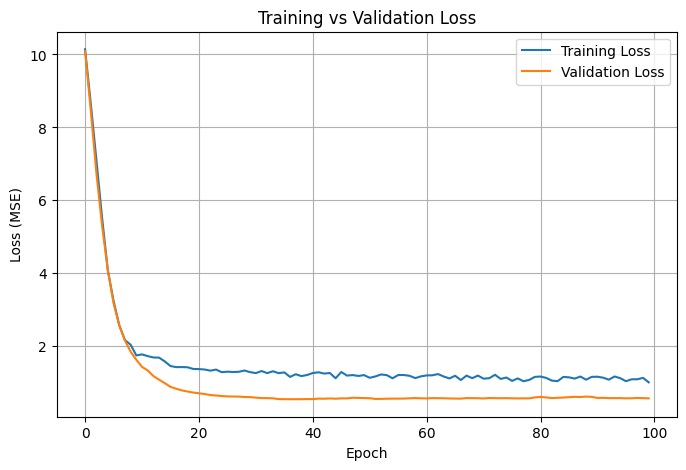

In [33]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Trying Classification

In [34]:
from tensorflow.keras.utils import to_categorical

In [39]:
def categorize_sgpa(sgpa):
    if sgpa < 2.0:
        return 'Low'
    elif sgpa < 3.0:
        return 'Medium'
    else:
        return 'High'
    
df_encoded['prev_sgpa'] = pd.to_numeric(df_encoded['prev_sgpa'], errors='coerce')
df_encoded = df_encoded.dropna(subset=['prev_sgpa'])
df_encoded['prev_sgpa_cat'] = df_encoded['prev_sgpa'].apply(categorize_sgpa)

In [40]:
X = df_encoded.drop(columns=['prev_sgpa', 'prev_sgpa_cat'])
y = df_encoded['prev_sgpa_cat']

label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)

y_cat = to_categorical(y_int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y
)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define NN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(3, activation='softmax')  # 3 classes: Low, Medium, High
])

C:\Users\Devyansh\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4694 - loss: 1.2476 - val_accuracy: 0.5397 - val_loss: 0.9206
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5366 - loss: 0.9674 - val_accuracy: 0.5649 - val_loss: 0.8496
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6199 - loss: 0.8036 - val_accuracy: 0.6276 - val_loss: 0.7680
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6963 - loss: 0.6798 - val_accuracy: 0.6736 - val_loss: 0.6893
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6249 - loss: 0.7824 - val_accuracy: 0.7197 - val_loss: 0.6246
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6728 - loss: 0.6896 - val_accuracy: 0.7782 - val_loss: 0.6041
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.7896 - val_accuracy: 0.7741 - val_loss: 0.5889
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6925 - loss: 0.6605 - val_accuracy: 0.7741 - val_loss: 0.5

In [43]:
from sklearn.metrics import classification_report

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
class_names = label_encoder.classes_
print(classification_report(y_true, y_pred, target_names=class_names))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

        High       0.89      0.78      0.83        85
         Low       0.84      0.79      0.82        48
      Medium       0.78      0.88      0.82       106

    accuracy                           0.82       239
   macro avg       0.84      0.82      0.82       239
weighted avg       0.83      0.82      0.82       239

